# Reading data from online web services

The following code walks through the process of reading web services from the USGS. 

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
# import data from online
import urllib, json
from datetime import datetime
%matplotlib inline

## A quick detour: Dictionaries

A dictionary is a collection which is unordered, changeable and indexed. In Python dictionaries are written with curly brackets, and they have keys and values. Some interactive tutorials: https://www.w3schools.com/python/python_dictionaries.asp

More in-depth tutorials and discussion about Python data types: https://www.datacamp.com/community/tutorials/python-dictionary-tutorial

In [0]:
# Example Dictionary: Big Ten Football Champions
B10Champs = {'2014': ['Ohio State','14-1'], '2015': ['Michigan State','12-2'], '2016': ['Penn State','11-3'], '2017': ['Ohio State','12-2'], '2018': ['Ohio State','13-1']}

In [18]:
print(B10Champs['2016'])

['Penn State', '11-3']


In [19]:
for key, value in B10Champs.items():
    print('The', key, 'Big 10 Football champion was',value[0],'with a record of',value[1])

The 2014 Big 10 Football champion was Ohio State with a record of 14-1
The 2015 Big 10 Football champion was Michigan State with a record of 12-2
The 2016 Big 10 Football champion was Penn State with a record of 11-3
The 2017 Big 10 Football champion was Ohio State with a record of 12-2
The 2018 Big 10 Football champion was Ohio State with a record of 13-1


## Obtaining real-time data from the USGS

Let's extract real-time data from a USGS monitoring well in Lee County, a heavily irrigated area of Illinois: https://waterdata.usgs.gov/il/nwis/uv/?site_no=413743089310102&PARAmeter_cd=72019,72020

To start, visit the following page and create a link to gather the appropriate data: https://waterservices.usgs.gov/rest/IV-Test-Tool.html

We want the last 500 days of depth-to-water data (72019) for the site 413743089310102.

## Let's first create the URL we are going to extract data from

In [0]:
siteNum = "413743089310102"
period_of_days = "500"
USGSparameter = "72019"

# URL with streamflow/groundwater data from the USGS
# url = 'https://waterservices.usgs.gov/nwis/iv/?format=json&sites=' + siteNum + '&period=P'+ period_of_days +'D&parameterCd=' + USGSparameter + '&siteStatus=all'
url = 'https://waterservices.usgs.gov/nwis/iv/?format=json&sites=413743089310102&period=P500D&parameterCd=72019&siteStatus=all'

## Let's open the URL and read the data in

First, we have to request to open the url, using urllib.request.urlopen(). Next, we have to load the json-formatted data, which will be read in as a dictionary

In [0]:
#open the URL
response = urllib.request.urlopen(url)
# read the data in as a dictionary
gw_data = json.loads(response.read())

In [22]:
gw_data.keys()

dict_keys(['name', 'declaredType', 'scope', 'value', 'nil', 'globalScope', 'typeSubstituted'])

In [23]:
gw_data['value'].keys()

dict_keys(['queryInfo', 'timeSeries'])

In [24]:
gw_data['value']['queryInfo']

{'criteria': {'locationParam': '[ALL:413743089310102]',
  'parameter': [],
  'variableParam': '[72019]'},
 'note': [{'title': 'filter:sites', 'value': '[ALL:413743089310102]'},
  {'title': 'filter:timeRange',
   'value': '[mode=PERIOD, period=P500D, modifiedSince=null]'},
  {'title': 'filter:methodId', 'value': 'methodIds=[ALL]'},
  {'title': 'requestDT', 'value': '2020-03-29T05:56:17.256Z'},
  {'title': 'requestId', 'value': '0177ff70-7182-11ea-989b-4cd98f8df011'},
  {'title': 'disclaimer',
   'value': 'Provisional data are subject to revision. Go to http://waterdata.usgs.gov/nwis/help/?provisional for more information.'},
  {'title': 'server', 'value': 'nadww01'}],
 'queryURL': 'http://nwis.waterservices.usgs.gov/nwis/iv/format=json&sites=413743089310102&period=P500D&parameterCd=72019&siteStatus=all'}

In [25]:
# note that gw_data['value']['timeSeries'] returns a list with one entry, which is a dictionary. Return the keys for that
gw_data['value']['timeSeries'][0].keys()

dict_keys(['sourceInfo', 'variable', 'values', 'name'])

In [26]:
# now we obtain source information, you will need this for your homework
gw_data['value']['timeSeries'][0]['sourceInfo']

{'geoLocation': {'geogLocation': {'latitude': 41.62877778,
   'longitude': -89.5169444,
   'srs': 'EPSG:4326'},
  'localSiteXY': []},
 'note': [],
 'siteCode': [{'agencyCode': 'USGS',
   'network': 'NWIS',
   'value': '413743089310102'}],
 'siteName': '19N8E-13.1a2 (LEE-92E)',
 'siteProperty': [{'name': 'siteTypeCd', 'value': 'GW'},
  {'name': 'hucCd', 'value': '07090007'},
  {'name': 'stateCd', 'value': '17'},
  {'name': 'countyCd', 'value': '17103'}],
 'siteType': [],
 'timeZoneInfo': {'daylightSavingsTimeZone': {'zoneAbbreviation': 'CDT',
   'zoneOffset': '-05:00'},
  'defaultTimeZone': {'zoneAbbreviation': 'CST', 'zoneOffset': '-06:00'},
  'siteUsesDaylightSavingsTime': False}}

In [27]:
gw_data['value']['timeSeries'][0]['values']

[{'censorCode': [],
  'method': [{'methodDescription': '', 'methodID': 51189}],
  'offset': [],
  'qualifier': [{'network': 'NWIS',
    'qualifierCode': 'A',
    'qualifierDescription': 'Approved for publication -- Processing and review completed.',
    'qualifierID': 0,
    'vocabulary': 'uv_rmk_cd'},
   {'network': 'NWIS',
    'qualifierCode': 'P',
    'qualifierDescription': 'Provisional data subject to revision.',
    'qualifierID': 1,
    'vocabulary': 'uv_rmk_cd'}],
  'qualityControlLevel': [],
  'sample': [],
  'source': [],
  'value': [{'dateTime': '2018-11-15T00:00:00.000-06:00',
    'qualifiers': ['A'],
    'value': '23.28'},
   {'dateTime': '2018-11-15T00:15:00.000-06:00',
    'qualifiers': ['A'],
    'value': '23.28'},
   {'dateTime': '2018-11-15T00:30:00.000-06:00',
    'qualifiers': ['A'],
    'value': '23.28'},
   {'dateTime': '2018-11-15T00:45:00.000-06:00',
    'qualifiers': ['A'],
    'value': '23.28'},
   {'dateTime': '2018-11-15T01:00:00.000-06:00',
    'qualifiers'

## Now let's extract the data from the dictionary that we actually need

In [0]:
# extract the list of dictionaries containing time series and value information
gw_data2 = gw_data['value']['timeSeries'][0]['values'][0]['value']
# extract the site name
sitename = gw_data['value']['timeSeries'][0]['sourceInfo']['siteName']

In [29]:
dtw = pd.DataFrame.from_dict(gw_data2)
dtw.index = pd.to_datetime(dtw['dateTime'])
dtw = dtw.drop(columns=['qualifiers','dateTime'])
print(dtw)

                           value
dateTime                        
2018-11-15 00:00:00-06:00  23.28
2018-11-15 00:15:00-06:00  23.28
2018-11-15 00:30:00-06:00  23.28
2018-11-15 00:45:00-06:00  23.28
2018-11-15 01:00:00-06:00  23.27
...                          ...
2020-03-28 22:45:00-06:00  21.68
2020-03-28 23:00:00-06:00  21.68
2020-03-28 23:15:00-06:00  21.68
2020-03-28 23:30:00-06:00  21.68
2020-03-28 23:45:00-06:00  21.68

[47676 rows x 1 columns]


## Next create a list for the time series and values

In [0]:
# Initialize arrays to store time and gage data
gw_gage = []
gw_time = [] # Datatype needs to be datetime here
# Add data from list of dictionaries into an array for time and gage
# note that gage requires conversion to a date time
for x in gw_data2:
    # add gage data, must convert from string to float
    gw_gage.append(float(x['value']))
    # extract date
    date = x['dateTime']
    datestr = date[:-10] # Don't include the last ten digits
    dat_time = datetime.strptime(datestr, '%Y-%m-%dT%H:%M:%S') # Convert string to datetime
    # append date time
    gw_time.append(dat_time)



## Finally let's plot the data

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


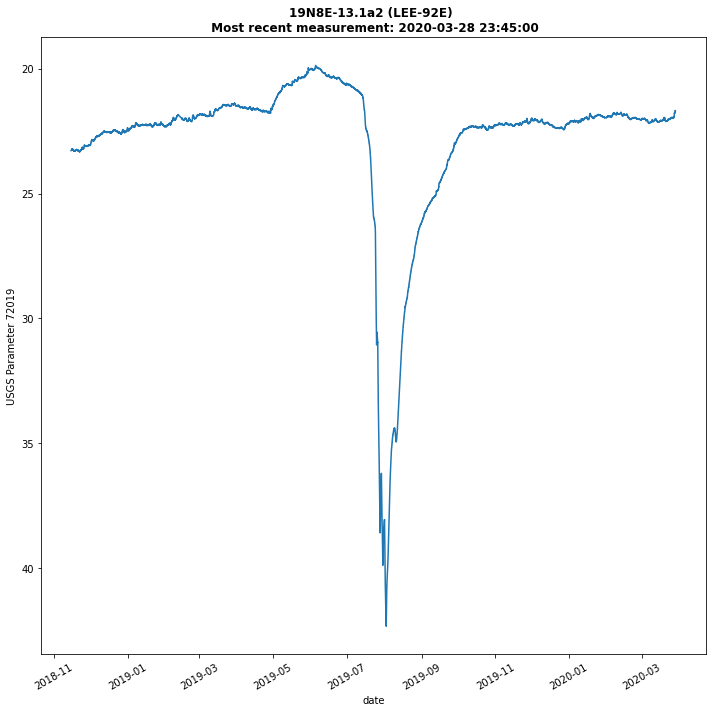

In [32]:
# control size of plot
plt.rcParams['figure.figsize'] = 10,10
# plot time vs gage (depth to water)
plt.plot(gw_time,gw_gage)
# add title with sitename and date
plt.title(sitename + ' \n ' + 'Most recent measurement: ' + str(dat_time), fontweight = 'bold')
plt.xticks(rotation=30)
plt.xlabel('date')
plt.ylabel('USGS Parameter '+USGSparameter)
if USGSparameter == '72019':
    plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()